Data loaded
######## Tail: 
                                                     text  label  \
194434  Works great just like my original one. I reall...    5.0   
194435  Great product. Great packaging. High quality a...    5.0   
194436  This is a great cable, just as good as the mor...    5.0   
194437  I really like it becasue it works well with my...    5.0   
194438  product as described, I have wasted a lot of m...    5.0   

                                                text_prep  token_count upper  \
194434  work great like origin one realli need extra c...           12    []   
194435  great product great packag high qualiti appl c...           19    []   
194436  great cabl good expens appl one husband daught...           64    []   
194437  realli like becasu work well life proof case n...           13    []   
194438  product describ wast lot money cord would buy ...           28    []   

                                                      pos  
194434  [(works, VBZ),

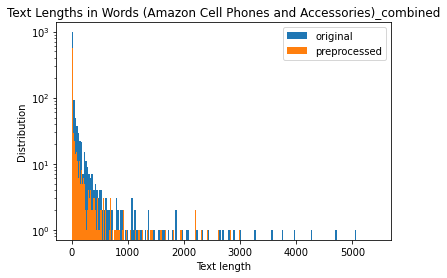

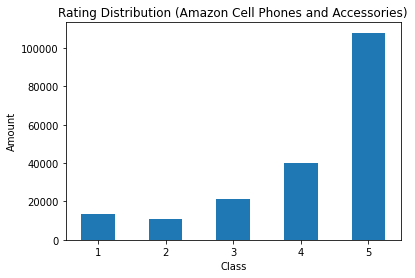

In [1]:
import pandas as pd
from Scripts import profiling as pf, preprocessing as prep, cleaning as cl

df = pd.read_pickle('../Data/amazon_phone.pkl')
print('Data loaded')
print('######## Tail: ')
print(df.tail())

print('######## GENERAL INFORMATION')
pf.get_review_count(df)

print('######## COMPLETION CHECK')
print('Missing Text')
pf.get_missing_text(df)
print('Missing Label')
pf.get_missing_label(df)
print('Before deleting empty review texts: ', len(df))
df = df[df['text'] != '']
print('After deleting empty review texts: ', len(df))

print('######## DUPLICATION CHECK')
df = cl.remove_duplicates(df)
df = cl.remove_dup_text(df)

print('######## WORD COUNT')
pf.create_word_count(df)
df.head()

pf.get_shortest_review(df)
pf.get_longest_review(df)

print('# Less than 10 words: ')
print(df[df.word_count<10]['label'].value_counts())
print('More than 1000 words: ')
print(df[df.word_count>1000]['label'].value_counts())

pf.show_word_length_dist(df, 'amazon_phone_pkl_textlength_raw_logarithmic', 'Amazon Cell Phones and Accessories', True)

print('######## RATING DISTRIBUTION')
pf.show_rating_dist(df, 'amazon_movie_pkl_rating_dist', 'Amazon Cell Phones and Accessories')

In [ ]:
# df = pf.get_source_info(df)

In [2]:
# POS
from nltk import word_tokenize, pos_tag, pos_tag_sents
texts = df.text.tolist()
tagged_texts = pos_tag_sents(map(word_tokenize, texts))
df['POS'] = tagged_texts

In [ ]:
# MOST FREQUENT WORDS
mostcommon = pf.get_mostcommon(df)

from collections import Counter
corpus = pd.Series(' '.join(df['text']).split())
corpus_counts = Counter(corpus)
mostcommon = pd.DataFrame(corpus_counts.most_common(100), columns=['Word', 'Frequency'])

In [ ]:
# WORD COUNT DISTRIBUTION THROUGHOUT RATINGS
pf.show_word_length_per_label(df)